# **🚦 Traffic Sign Recognition Model**

### **Overview**
This Jupyter Notebook trains and evaluates a Convolutional Neural Network (CNN) for the task of Traffic Sign Recognition. The model's objective is to accurately classify images into one of 43 distinct traffic sign categories.

---
### **Model & Architecture**

* **Framework:** Keras (TensorFlow backend)

* **Model Type:** Sequential CNN

* **Input Size:** Images are preprocessed and resized to 30x30x3 (RGB).

* **Key Layers: ** The architecture employs multiple Conv2D layers for feature extraction, followed by MaxPool2D layers for downsampling, and Dropout layers for regularization, culminating in a Dense output layer with a Softmax activation.

---
### **Data & Preprocessing**

•	**Dataset Size:** 43,905 images (Train and Test combined).

•	**Preprocessing:** Images are normalized and labels are transformed using one-hot encoding.

---
### **Performance**

The model was trained for 20 epochs using the Adam optimizer and categorical_crossentropy loss.


**Validation Accuracy:** 99.0%

**External Test Accuracy:** 95.5%

---

### **Usage**
The final trained model is saved as ./training/TSR.keras and can be loaded for real-time predictions on new traffic sign images. The prediction function handles automatic resizing to 30x30 pixels.



### 📂 Mount Google Drive

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ⚙️ Set Project Working Directory

In [64]:
import os

project_path = '/content/drive/Othercomputers/PC/Projects/TSIRM/TSF'

project_path_full = '/content/drive/Othercomputers/PC/Projects/TSIRM/TSF'



try:
    os.chdir(project_path_full)
    print("✅ Successfully changed directory to:", os.getcwd())
except FileNotFoundError:
    print(f"❌ Error: Directory not found at {project_path_full}")
    print("Please double-check the exact folder names and capitalization on your Google Drive.")

✅ Successfully changed directory to: /content/drive/Othercomputers/PC/Projects/TSIRM/TSF


### 📦 Importing Required Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image, UnidentifiedImageError

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

### 🔢 Initialize Variables and Check Path

In [66]:
data = []
labels = []

classes = 43
cur_path = os.getcwd()

In [67]:
cur_path

'/content/drive/Othercomputers/PC/Projects/TSIRM/TSF'

### 🖼️ Read, Resize, and Convert Images

In [68]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image_path = os.path.join(path, a)
            image = Image.open(image_path)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [69]:
data = np.array(data)
labels = np.array(labels)

### 💾 Save Prepared Data Arrays

In [ ]:
os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

### 🔄 Load Data & Labels

In [71]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [72]:
print(data.shape, labels.shape)

(43905, 30, 30, 3) (43905,)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [74]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35124, 30, 30, 3) (8781, 30, 30, 3) (35124,) (8781,)


### 🏷️ One-Hot Encode Labels

In [75]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

### 🛠️ Building the Model

In [76]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(43, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### ⚙️ Compilation of the **Model**

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 148s 133ms/step - accuracy: 0.3437 - loss: 3.4324 - val_accuracy: 0.9298 - val_loss: 0.2686
Epoch 2/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 198s 129ms/step - accuracy: 0.8729 - loss: 0.4530 - val_accuracy: 0.9748 - val_loss: 0.1031
Epoch 3/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 138s 126ms/step - accuracy: 0.9209 - loss: 0.2807 - val_accuracy: 0.9858 - val_loss: 0.0587
Epoch 4/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 140s 128ms/step - accuracy: 0.9327 - loss: 0.2516 - val_accuracy: 0.9760 - val_loss: 0.0897
Epoch 5/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 142s 128ms/step - accuracy: 0.9368 - loss: 0.2355 - val_accuracy: 0.9606 - val_loss: 0.1312
Epoch 6/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 142s 128ms/step - accuracy: 0.9499 - loss: 0.1931 - val_accuracy: 0.9885 - val_loss: 0.0475
Epoch 7/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 142s 128ms/step - accuracy: 0.9501 - loss: 0.1996 - val_accuracy: 0.9860 - val_loss: 0.0541
Epoch 8/20
1098/1098 ━━━━━━━━━━━━━━━━━━━━ 138s 126ms/step - ac

### 📊 Displaying Accuracy and Loss curves

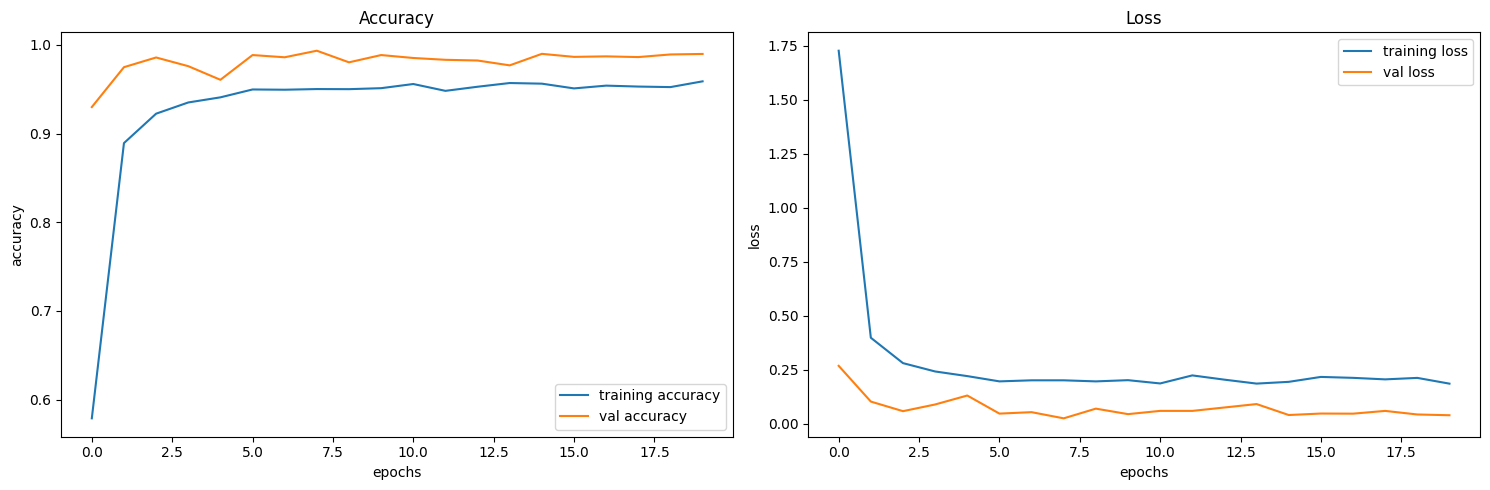

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(history.history['accuracy'], label='training accuracy')
ax[0].plot(history.history['val_accuracy'], label='val accuracy')
ax[0].set_title('Accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')
ax[0].legend()


ax[1].plot(history.history['loss'], label='training loss')
ax[1].plot(history.history['val_loss'], label='val loss')
ax[1].set_title('Loss')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
ax[1].legend()

plt.tight_layout()

plt.savefig('training_metrics_combined.png')

### 🧪 Load and Prepare Test Data

In [61]:
from tqdm import tqdm

def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    original_labels = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data = []
    valid_labels = []

    cur_path = os.getcwd()

    for index, img_relative_path in enumerate(tqdm(imgs, desc='Loading Test Data')):

        image_absolute_path = os.path.join(cur_path, img_relative_path)

        try:
            image = Image.open(image_absolute_path)

            image = image.resize((30, 30))
            data.append(np.array(image))

            valid_labels.append(original_labels[index])

        except (FileNotFoundError, UnidentifiedImageError) as e:

            tqdm.write(f"Warning: Skipping file {img_relative_path} due to error: {e}")

        except Exception as e:
            tqdm.write(f"Warning: An unexpected error occurred with {img_relative_path}: {e}. Skipping.")

    X_test = np.array(data)
    Y_test_final = np.array(valid_labels)

    print(f"\n✅ Finished loading. Total valid images loaded: {X_test.shape[0]}")

    return X_test, Y_test_final

In [62]:
 X_test, label = testing('Test.csv')

Loading Test Data: 100%|██████████| 12630/12630 [00:50<00:00, 251.59it/s]


✅ Finished loading. Total valid images loaded: 12630


In [52]:
probabilities = model.predict(X_test)
Y_pred = np.argmax(probabilities, axis=1)

Y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step


array([16,  1, 38, ...,  1,  7, 10])

### ✅ Calculate Test Accuracy

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9552652414885194


### 💾 Save Trained Model

In [29]:
model.save("./training/TSR.keras")

### 📥 Load Saved Model

In [31]:
import os
os.chdir(r'/content/drive/Othercomputers/PC/Projects/TSIRM/TSF')
from keras.models import load_model
model = load_model('./training/TSR.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 14 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### 🚦 Traffic Sign Class Labels

In [53]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

### 🖼️ Function to Test Image

In [55]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)

    probabilities = model.predict(X_test)

    Y_pred = np.argmax(probabilities, axis=1)
    return image,Y_pred

### 🎯 Test Model on a Sample Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted traffic sign is:  General caution


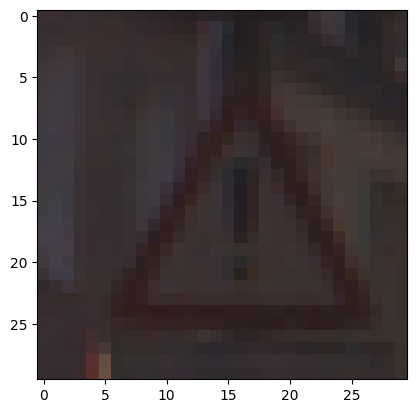

In [54]:
plot,prediction = test_on_img(r'/content/drive/Othercomputers/PC/Projects/TSIRM/TSF/Test/00379.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()